<a href="https://colab.research.google.com/github/RupeshSharma14/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# <b> Data Description </b>

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

### <b>Attribute Information: </b>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# **Importing Libraries**

In [1]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000' 
sns.set_style('darkgrid');

In [3]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset in pandas 

path = "/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv"
bike_df = pd.read_csv(path, encoding = "latin")

In [5]:
# Displaying the first five rows of the dataset

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Displaying the last five rows of the dataset

bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Size of the dataset

bike_df.shape

(8760, 14)

The dataset has 8760 rows and 14 columns.



In [8]:
# Checking for duplicate data

bike_df.duplicated().sum()

0

There are no duplicate rows in the dataset.


In [9]:
# Checking for any NULL values

bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing values in the dataset.



In [10]:
# Checking for data types of variables

bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Date is an object data type. We should convert it into datetime datatype.



In [11]:
# Converting the data type of "Date" column to datetime object

bike_df["Date"] = bike_df["Date"].astype("datetime64")

In [12]:
# Extracting new features from "Date" column

bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month_name()
bike_df['Weekday'] = bike_df['Date'].dt.day_name()

In [13]:
# Dropping "Date" column

bike_df.drop(columns = "Date", inplace = True)

In [14]:
# Descriptive summary of the numerical attributes

bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# **Data Exploration**

### **Univariate Analysis**

**1. Dependent variable**

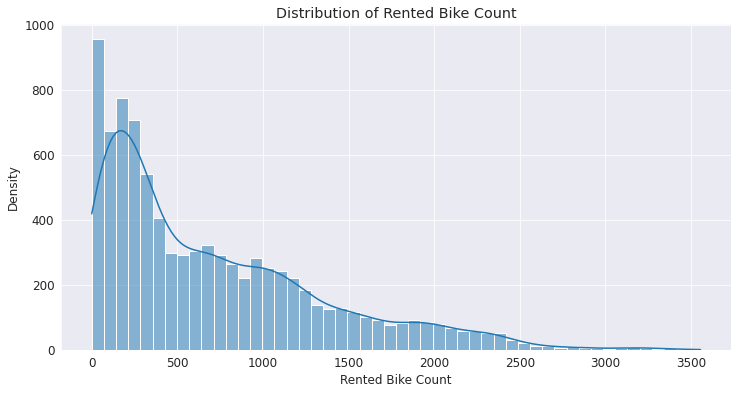

In [15]:
# Distribution of Dependent variable

sns.histplot(bike_df["Rented Bike Count"], kde = "True", bins = 50)
plt.title("Distribution of Rented Bike Count") 
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

plt.show()

**Insights:**
* The dependent variable is right skewed.





We will apply square root transformation  in later stage so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. For now lets visualise how the dependent variable will look after transformation.

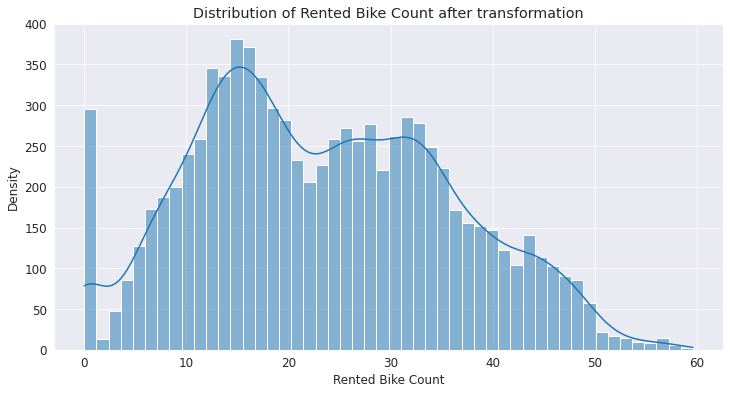

In [16]:
# Distribution of Dependent variable after transformation

sns.histplot(np.sqrt(bike_df["Rented Bike Count"]), kde = "True", bins = 50)
plt.title("Distribution of Rented Bike Count after transformation") 
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
plt.show()

Now the distribution looks closer to normal distribution.



**2. Continuous variables**

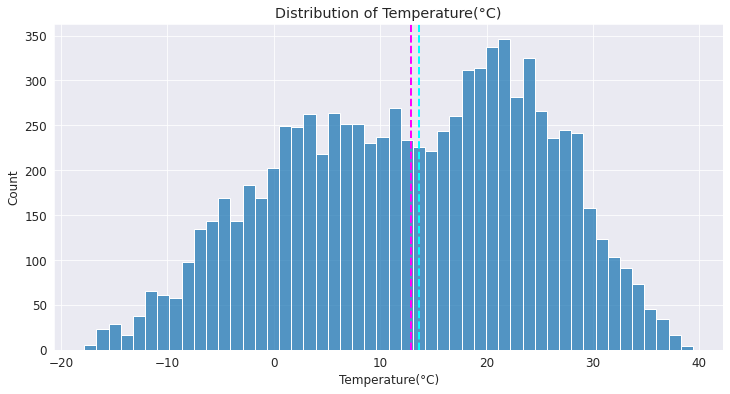

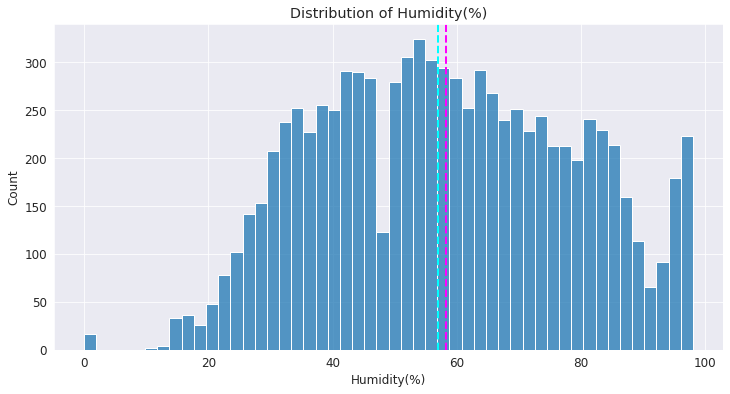

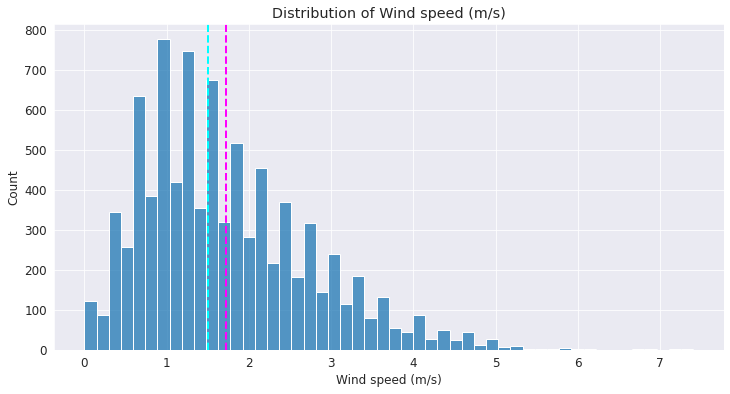

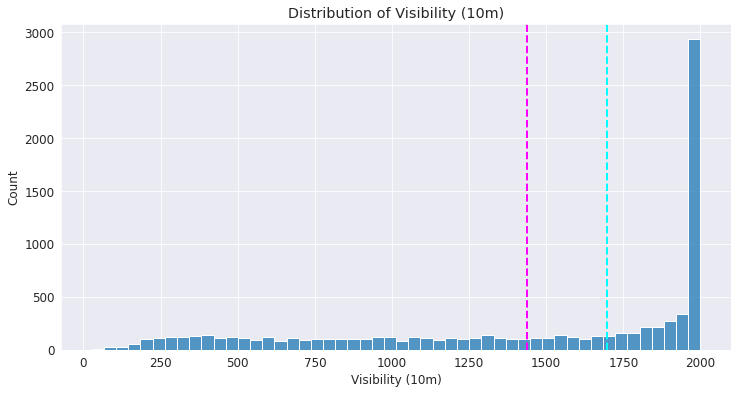

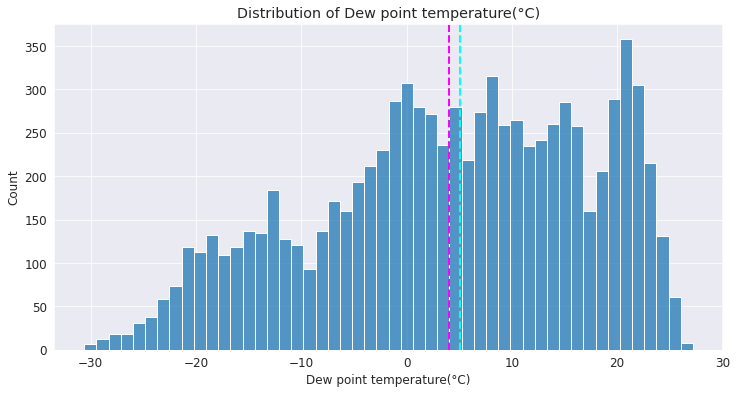

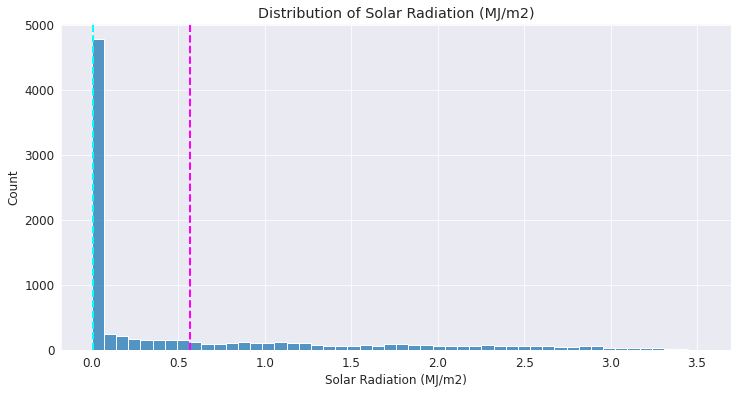

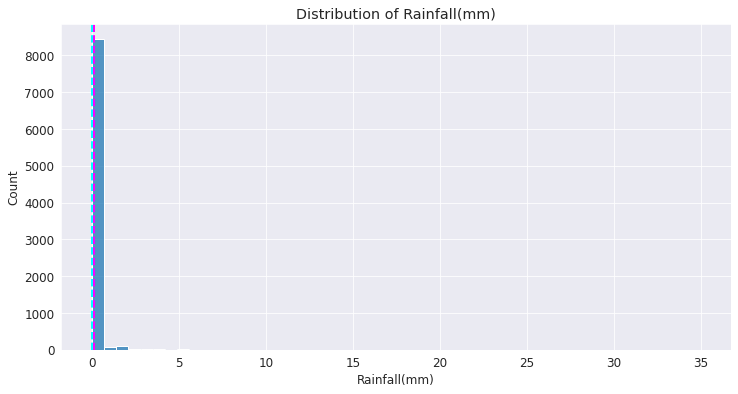

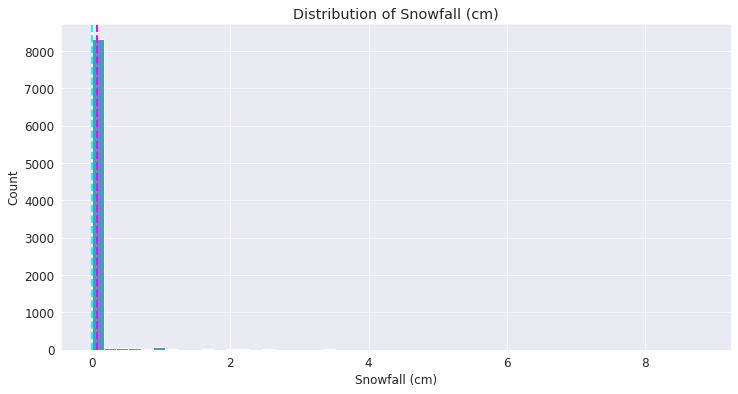

In [17]:
# Distribution of Continuous features

continuous_features =  ["Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)",
                        "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]

for col in continuous_features:
  fig = plt.figure(figsize = (12, 6))
  feature = bike_df[col]
  ax = fig.gca()
  sns.histplot(feature, bins = 50)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(f"Distribution of {col}") 

plt.show()

**Insights:**
* Most of our continuous features are skewed due to their inherent values.








Since skewed features are constituted of inherent values, changing their natural distribution is not a good option. On this dataset, robust machine learning models such as Decision Tree, Random Forest, and others would be substantially more efficient than other regression-based models which are sensitive to skewness, although it should be prudent to start with simple models as a baseline.

**3. Categorical variables**

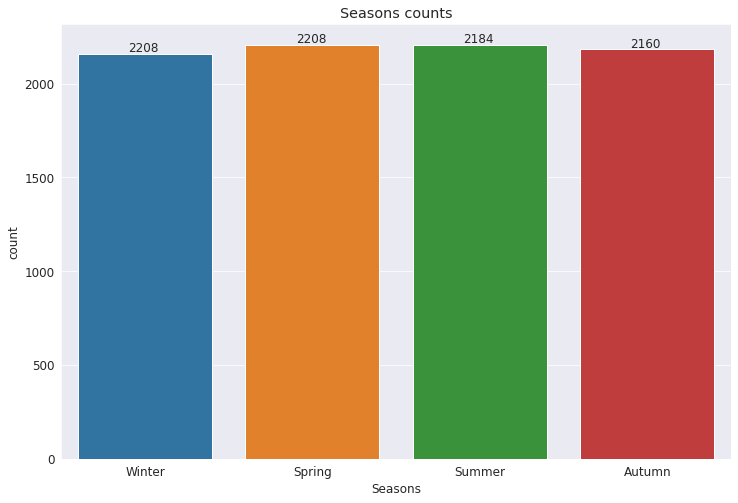

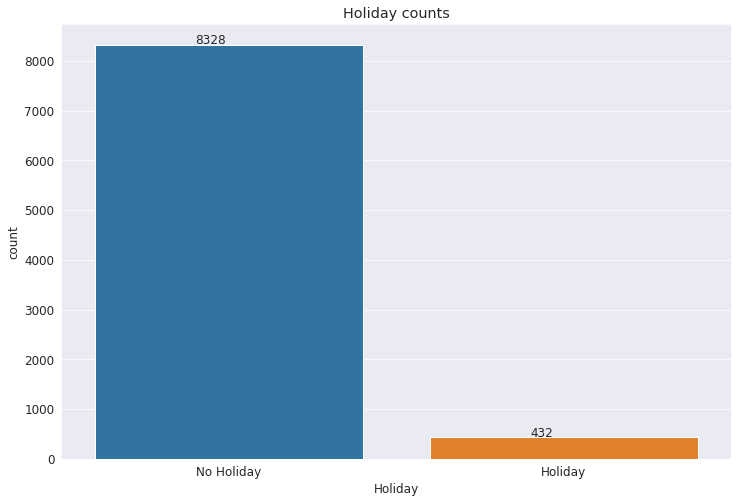

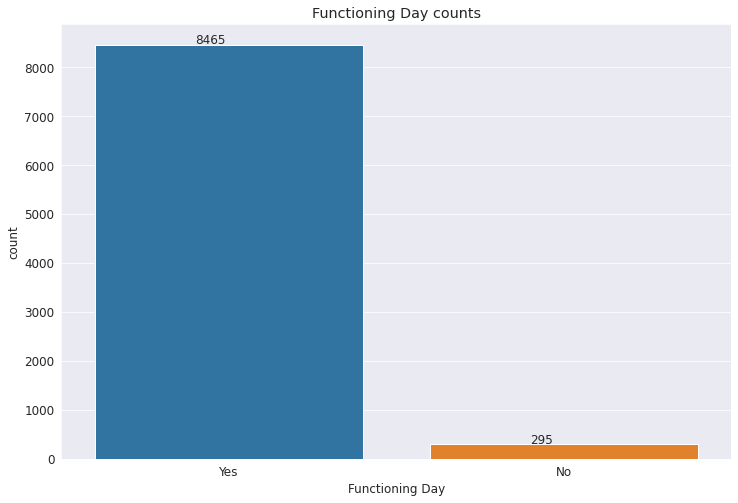

In [18]:
# Representation of Categorical features

categorical_features = ["Seasons", "Holiday", "Functioning Day"]

for col in categorical_features:
  fig = plt.figure(figsize = (12, 8))
  ax = fig.gca()
  feature = bike_df[col]
  ax = sns.countplot(x = feature)
  for p, label in zip(ax.patches, feature.value_counts().values):
    ax.annotate(label, (p.get_x()+0.300, p.get_height()+ 10))

  ax.set_title(col + " counts")

plt.show()

**Insights:** 
* All the seasons are equally represented in the data.
* In the dataset, holidays account for only 4.93 per cent of the overall.
* The dataset only has a 3.3 per cent representation of non-functioning days.

Since the data is from the years 2017 and 2018, these representations appear to be accurate within this time period.

**4. Cyclical variables**

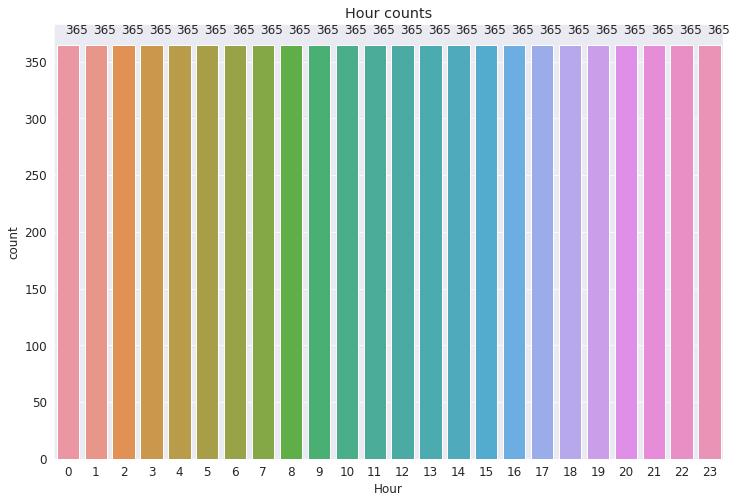

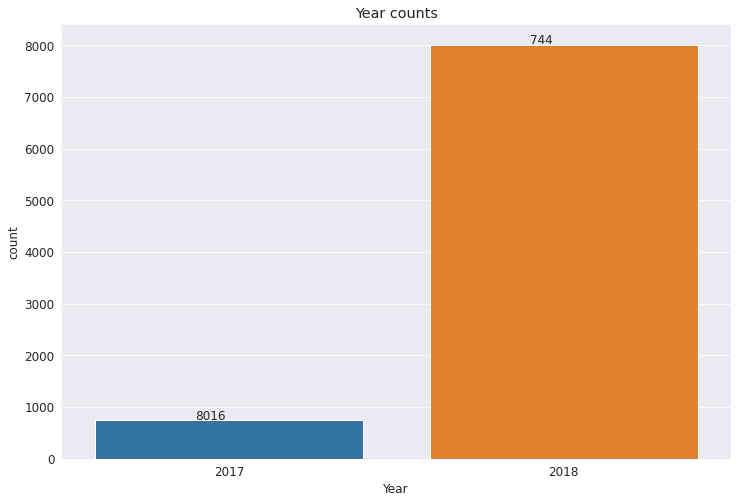

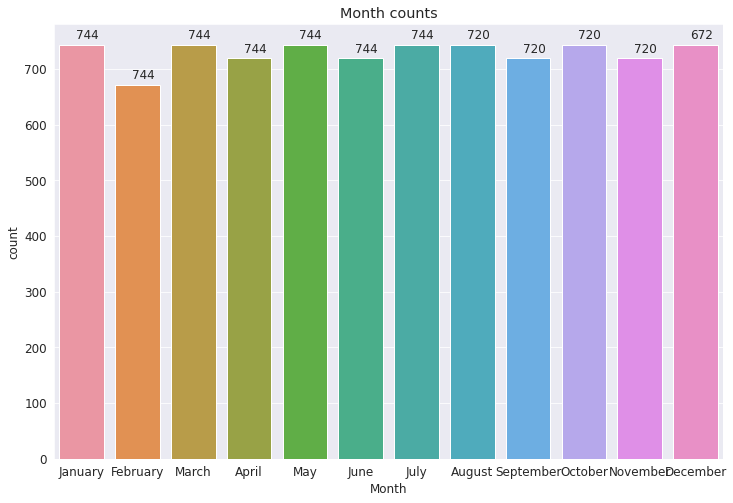

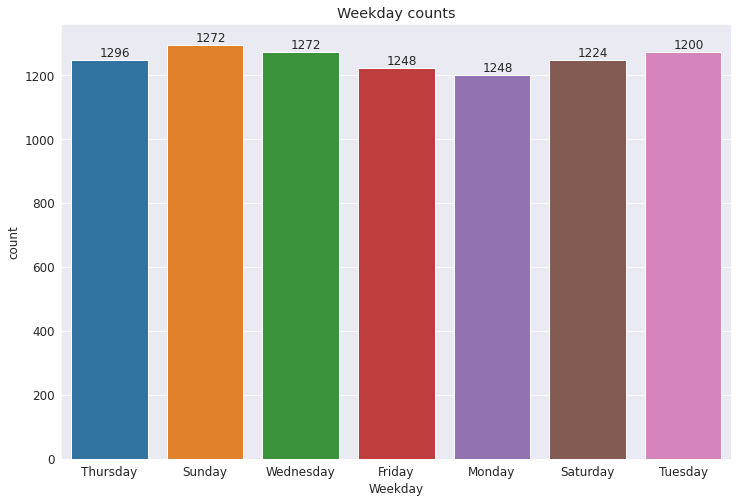

In [19]:
# Representation of Cylical features

cyclical_features = ["Hour", "Year", "Month", "Weekday"]

for col in cyclical_features:
  fig = plt.figure(figsize = (12, 8))
  ax = fig.gca()
  feature = bike_df[col]
  ax = sns.countplot(x = feature)
  for p, label in zip(ax.patches, feature.value_counts().values):
    ax.annotate(label, (p.get_x()+0.300, p.get_height()+ 10))

  ax.set_title(col + " counts")

plt.show()

**Insights:**
* The majority of the data was collected in 2018.
* Except for the year, all cyclical features are equally represented.

Within the time of collected data, the representation of cyclical features also appears to be true.

## **Bivariate Analysis**

**1. Relation between Continuous variables and Dependent variable**

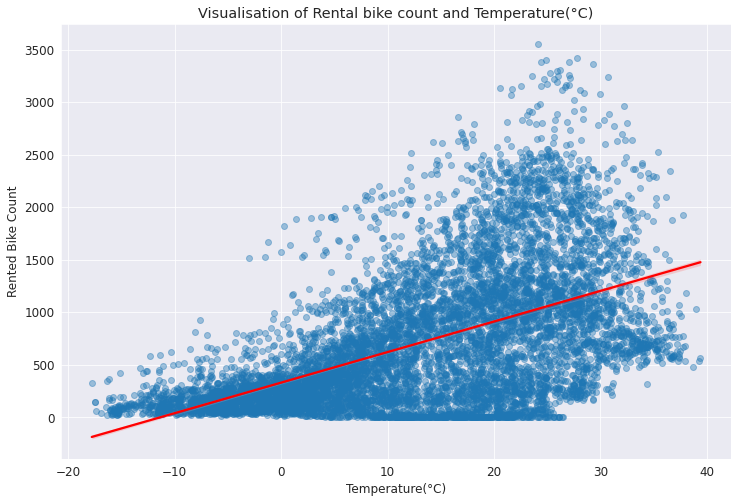

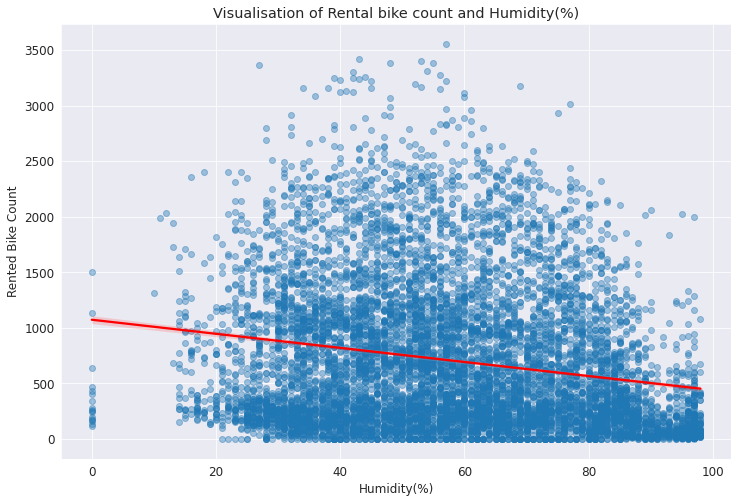

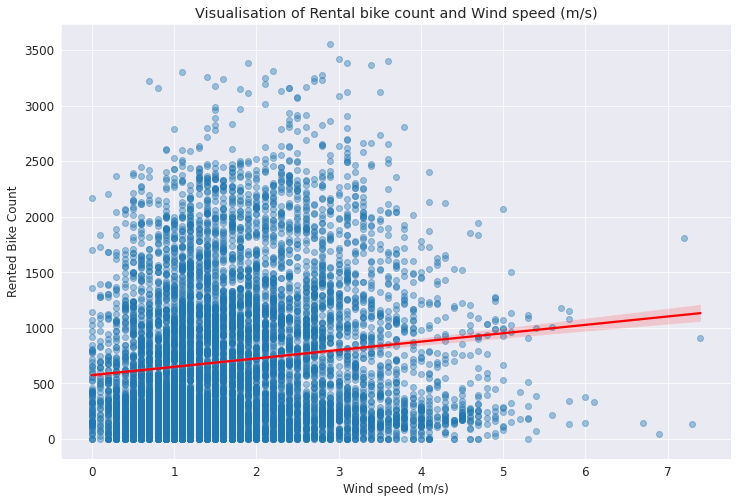

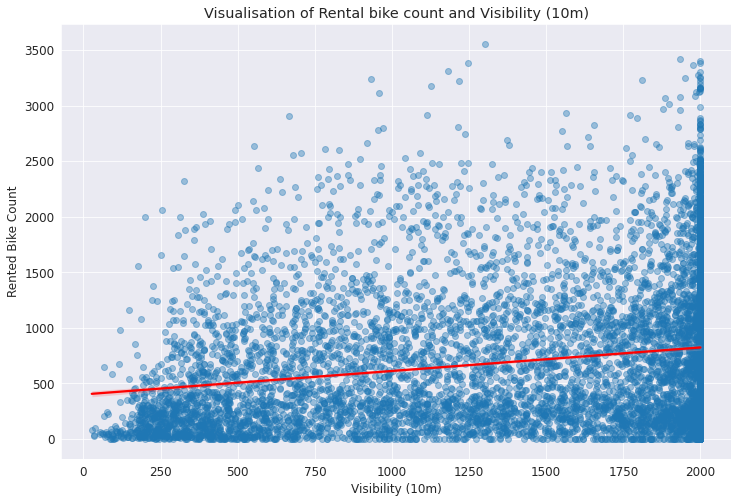

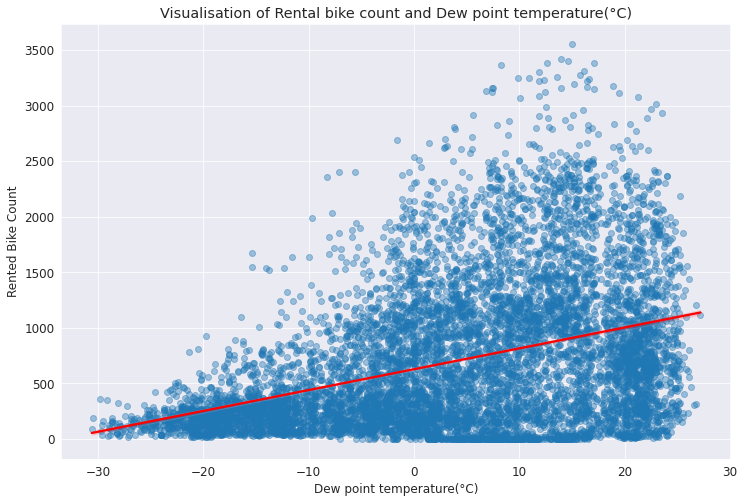

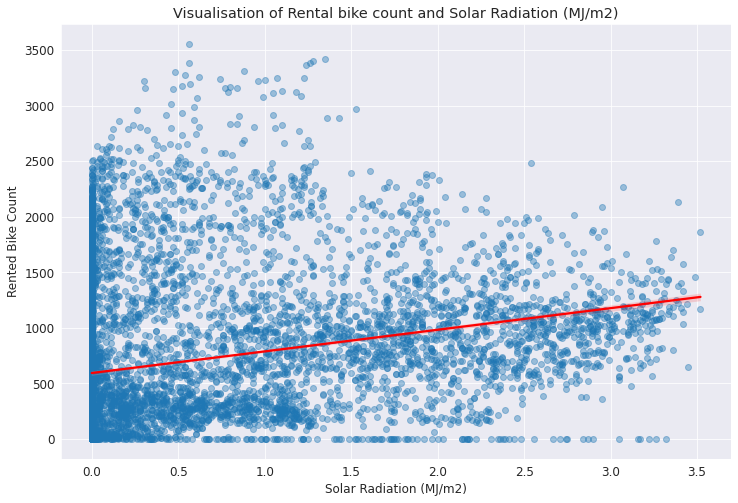

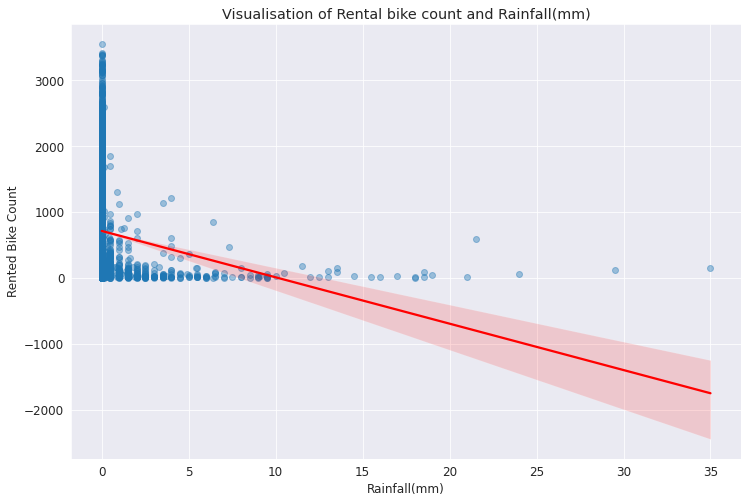

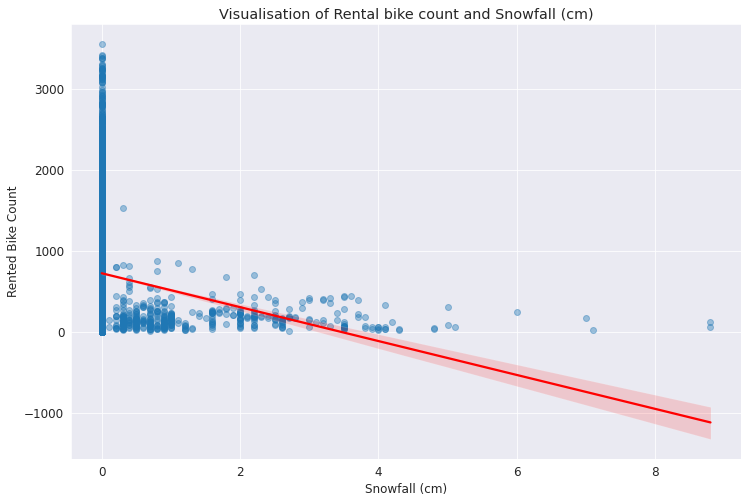

In [20]:
# Visualising the relation between bike count and continuous variables

for col in continuous_features:
  fig = plt.figure(figsize = (12, 8))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  sns.regplot(x = feature, y = label, scatter_kws = {"alpha": 0.4}, line_kws = {"color": "red"})
  ax.set_title("Visualisation of Rental bike count and " + col)
  
plt.show()

**Insights:**
* Most features appear to have a positive linear relationship with the dependent variable, apart from humidity, rainfall, and snowfall.
* Humidity, rainfall, and snowfall have an negative linear relationship with dependent variable.



It appears that continuous features have a linear relationship to rented bike count, we can use Linear Regression to create a simple baseline model to get a head start after verifying the model's other assumptions.

**2. Relation between Categorical variables and Dependent variable**



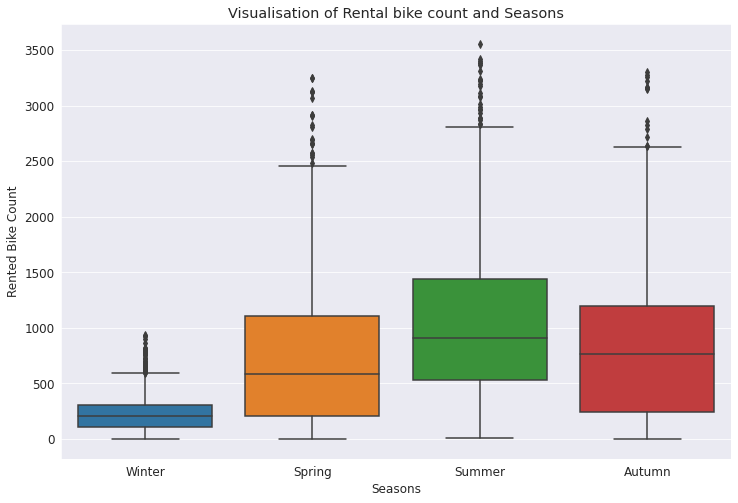

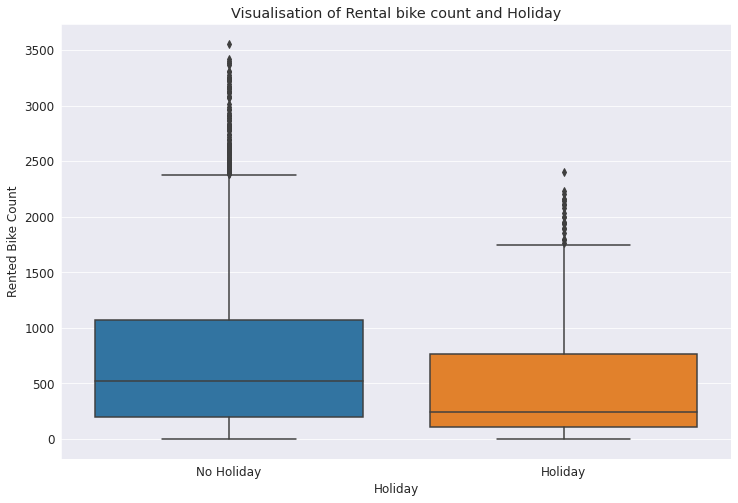

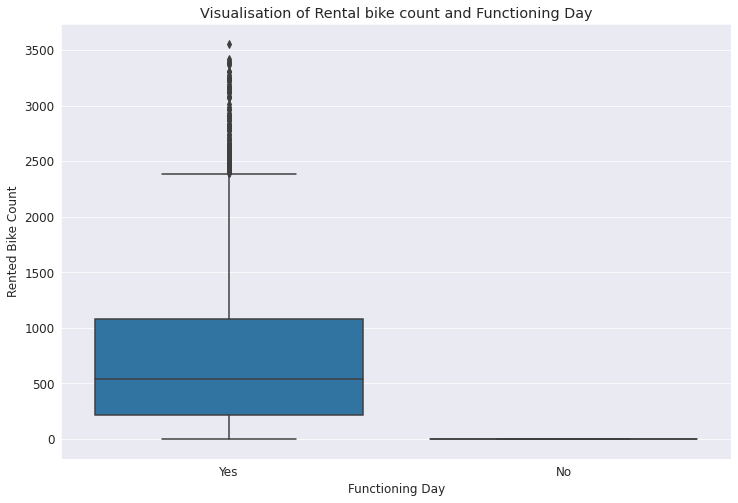

In [21]:
# Visualising the relation between rented bike count and categorical variables

for col in categorical_features:
  fig = plt.figure(figsize = (12, 8))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  sns.boxplot(x = feature, y = label)
  ax.set_title("Visualisation of Rental bike count and " + col)
  
plt.show()

**Insights:**
* In the summer and autumn, there is a large demand for bicycles, however in the winter, there is low demand.
* During the holidays, there is very little demand for bikes.
* On non-working days, bike demand is basically non-existent.
* There is a significant overlap in the distribution of sub-categories of Seasons and Holiday variables.

The distribution of these overlapped sub-categories in categorical features like Seasons and Holidays indicates that these sub-categories might be less useful for the models. We will, however, leave it up to our models to select which features are appropriate for them.

**3. Relation between Cyclical variables and Dependent variable**

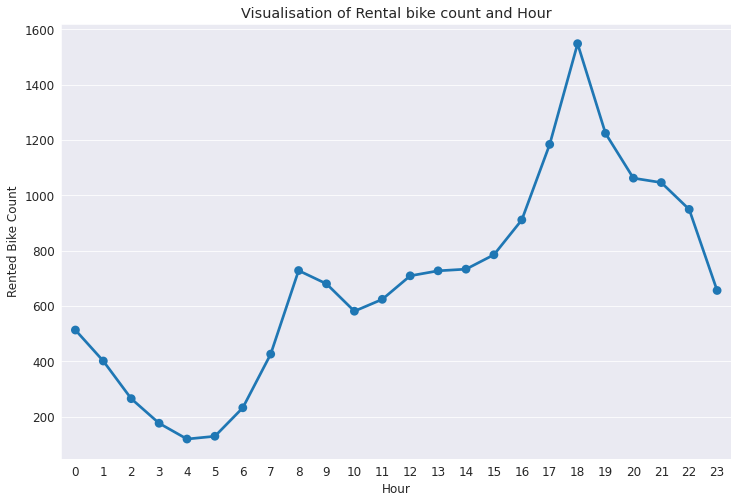

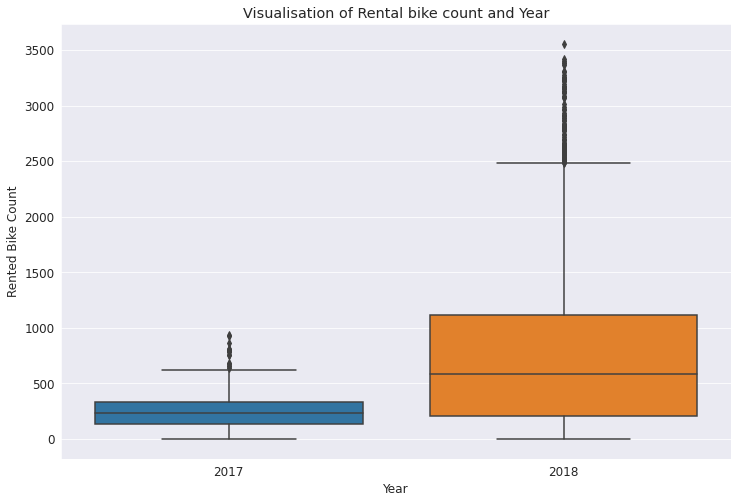

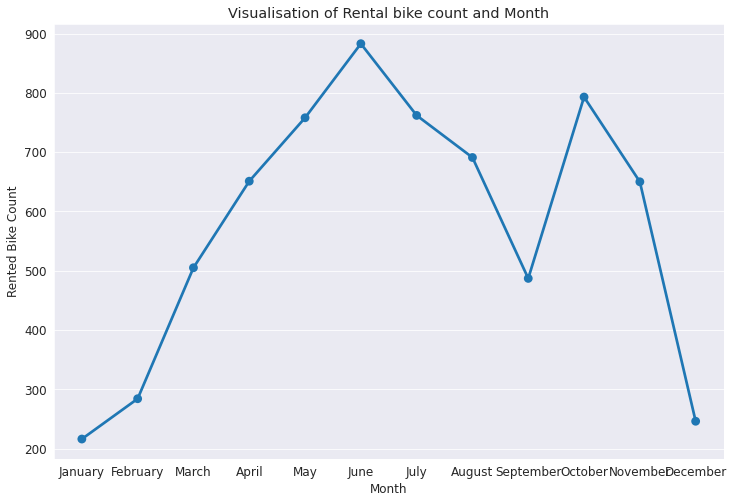

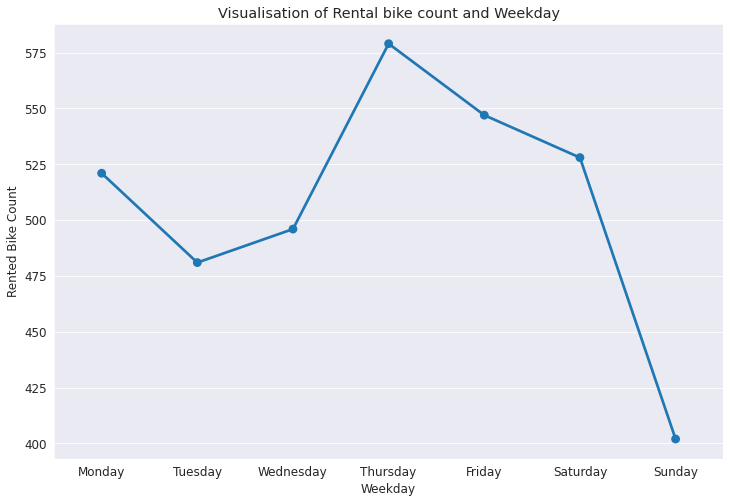

In [22]:
# Visualising the relation between rented bike count and categorical variables

months_order = ["January", "February", "March", "April", "May", "June", "July", 
                "August", "September", "October", "November", "December"]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for col in cyclical_features:
  fig = plt.figure(figsize = (12, 8))
  ax = fig.gca()
  df = bike_df.groupby(col)["Rented Bike Count"].median().round().reset_index().sort_values(by = "Rented Bike Count", ascending = False)
  feature = df[col]
  label = df["Rented Bike Count"]
  if col == "Month":
    sns.pointplot(x = feature, y = label, order = months_order)
  elif col == "Weekday":
    sns.pointplot(x = feature, y = label, order = days_order)
  elif col == "Hour":
    sns.pointplot(x = feature, y = label)
  else:
    sns.boxplot(x = bike_df[col], y = bike_df["Rented Bike Count"])
  ax.set_title("Visualisation of Rental bike count and " + col)
  
plt.show()

**Insights:**
* There is a noticeable increase in the number of rented bikes between the 8th and 18th hour of the day.
* When compared to 2017, the number of shared bikes on the road climbed dramatically in 2018.
* In the months of May, June, and July, there is a larger demand for bicycles.
* The demand for bicycles is highest on Thursdays and Fridays, and lowest on Sundays.

The cyclical features appear to have a significant impact on the rented bike count.

## **Multivariate Analysis**

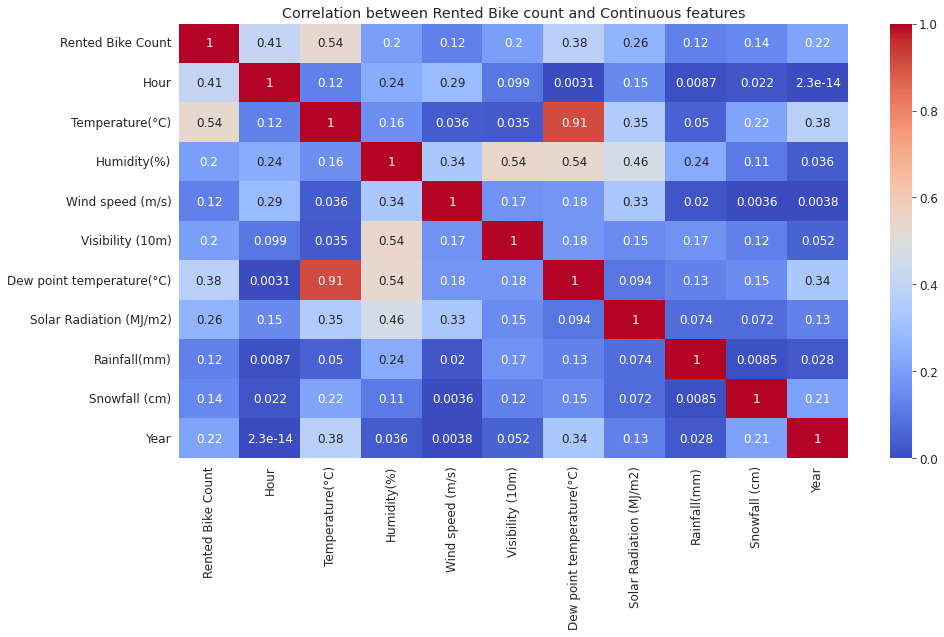

In [23]:
# Correlation matrix

plt.figure(figsize = (15, 8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")
plt.title("Correlation between Rented Bike count and Continuous features")
plt.show()

**Insights:**
* The number of rental bikes is highly correlated with hour and temperature. 
* Multicollinearity appears to exist in the data.





Although all continuous features appear to have a linear relationship with the dependent variable, only a few appear to be strongly correlated.

## **Checking Multicollinearity**

In [24]:
# Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,4.450547
1,Temperature(°C),188.496720
2,Humidity(%),186.877169
3,Wind speed (m/s),4.811966
4,Visibility (10m),10.313000
5,Dew point temperature(°C),126.950456
6,Solar Radiation (MJ/m2),2.888695
7,Rainfall(mm),1.103251
8,Snowfall (cm),1.127819
9,Year,397.756221


Dew Point temperature and Year are highly correlated features. Therefore we will drop both the features.

In [26]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)", "Year"]]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


Now our features are independent of each others.

# **Data Preparation**


In [27]:
# Encoding cyclical features into there numerical representation

month_mapping = {"January": 0, "February": 1, "March": 2, "April": 3, "May": 4, "June": 5, "July": 6,
       "August": 7, "September": 8, "October": 9, "November": 10, "December": 11}
weekday_mapping = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}

bike_df["Month"] = bike_df["Month"].map(month_mapping)
bike_df["Weekday"] = bike_df["Weekday"].map(weekday_mapping)

In [28]:
# Performing feature engineering on cyclical features

bike_df["hour_sin"] = np.sin(bike_df["Hour"] * (2 * np.pi /24))
bike_df["hour_cos"] = np.cos(bike_df["Hour"] * (2 * np.pi /24))
bike_df["month_sin"] = np.sin(bike_df["Month"] * (2 * np.pi / 12))
bike_df["month_cos"] = np.cos(bike_df["Month"] * (2 * np.pi / 12))
bike_df["weekday_sin"] = np.sin(bike_df["Weekday"] * (2 * np.pi / 7))
bike_df["weekday_cos"] = np.cos(bike_df["Weekday"] * (2 * np.pi / 7))

In [29]:
bike_df.drop(columns = ["Hour", "Dew point temperature(°C)", "Year", "Month", "Weekday"], inplace = True)
bike_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,hour_sin,hour_cos,month_sin,month_cos,weekday_sin,weekday_cos
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.000000,1.000000,0.0,1.0,0.433884,-0.900969
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.258819,0.965926,0.0,1.0,0.433884,-0.900969
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.500000,0.866025,0.0,1.0,0.433884,-0.900969
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.707107,0.707107,0.0,1.0,0.433884,-0.900969
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.866025,0.500000,0.0,1.0,0.433884,-0.900969


In [30]:
# Splitting the train set and test set using random sampling

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bike_df, test_size = 0.2, random_state = 42)

In [31]:
bike_count = np.sqrt(train_set["Rented Bike Count"].copy())
features = train_set.drop(columns = "Rented Bike Count")

In [32]:
from sklearn.preprocessing import MinMaxScaler

num_attribs = features.describe().columns

scaler = MinMaxScaler()
features[num_attribs] = scaler.fit_transform(features[num_attribs])

In [33]:
test_bike_count = np.sqrt(test_set["Rented Bike Count"].copy())
test_features = test_set.drop(columns = "Rented Bike Count")

In [34]:
test_features[num_attribs] = scaler.transform(test_features[num_attribs])

**Linear Regression**

In [35]:
lr_features = pd.get_dummies(features, columns = ["Seasons", "Functioning Day", "Holiday"], drop_first = True)
lr_test_features = pd.get_dummies(test_features, columns = ["Seasons", "Functioning Day", "Holiday"], drop_first = True)

In [36]:
# Calculates RMSE score
from sklearn.metrics import mean_squared_error, r2_score

def rmse(bike_count, bike_count_pred):
  return mean_squared_error((bike_count) ** 2, (bike_count_pred) ** 2, squared = False)

In [37]:
# RFE
# from sklearn.feature_selection import RFE
from yellowbrick.model_selection import rfecv
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, learning_curve

In [38]:
def feature_selection(model, features, label):
  rfe = rfecv(estimator = model, X = features, y = label, scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
  features_name = features.columns.tolist()
  cols, sel, rank = [], [], []
  for i in range(len(features_name)):
    cols.append(features_name[i])
    sel.append(rfe.support_[i])
    rank.append(rfe.ranking_[i])
  features_df = pd.DataFrame({"Columns": cols, "Selected": sel, "Rank": rank})
  selected_features = features_df[features_df["Selected"] == True]["Columns"].tolist()

  return selected_features

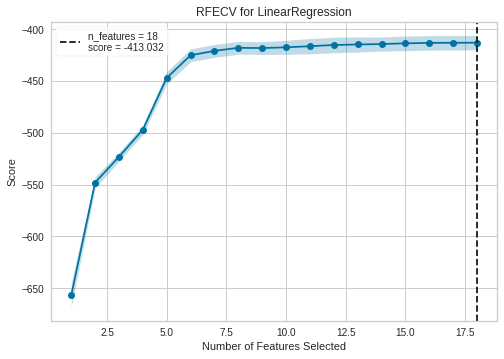

In [39]:
lr_selc_features = feature_selection(LinearRegression(), lr_features, bike_count)

In [40]:
lr_data_prep = lr_features[lr_selc_features].copy()
lr_test_data_prep  = lr_test_features[lr_selc_features].copy()

In [41]:
lr = LinearRegression()
lr.fit(lr_data_prep, bike_count)

LinearRegression()

In [42]:
def evaluate(model, data_prepared, label_prepared, cross_val = False):

  if cross_val:
    model_scores = cross_val_score(model, data_prepared, 
                                      label_prepared, scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
    score = np.mean(-model_scores)
  else:
    bike_count_pred = model.predict(data_prepared)
    score = mean_squared_error((label_prepared ** 2), (bike_count_pred ** 2), squared = False)

  return score

In [43]:
evaluate(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count)

411.93396140568456

In [44]:
evaluate(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count, cross_val = True)

413.03211500061127

In [45]:
def plot_learning_curves(model, data_prepared, label_prepared):
  train_sizes, train_scores, test_scores = learning_curve(model, data_prepared, label_prepared
                                                          , n_jobs = -1, scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
  train_scores_mean = np.mean(-train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(-test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
    
  # plot the std deviation as a transparent range at each training set size
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

  # plot the average training and test score lines at each training set size
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

  ax.set_title(model)
  plt.xlabel("Training ")
  plt.legend(loc="best")
  plt.ylim()

  plt.show()

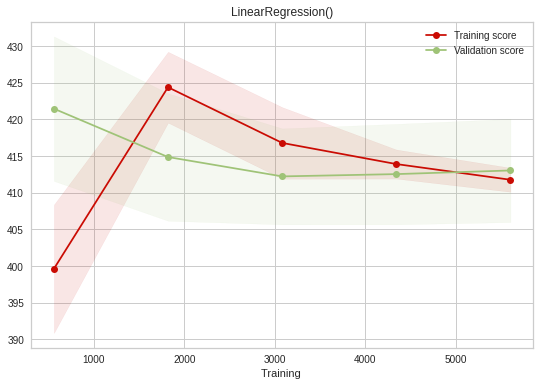

In [46]:
plot_learning_curves(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count)

**Decision Tree**

In [47]:
seasons_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3}
func_day_mapping = {"Yes": 1, "No": 0}
holiday_mapping = {"Holiday": 1, "No Holiday": 0}

In [48]:
tree_features = features.copy()
tree_test_features = test_features.copy()

tree_features["Seasons"] = tree_features["Seasons"].map(seasons_mapping)
tree_features["Functioning Day"] = tree_features["Functioning Day"].map(func_day_mapping)
tree_features["Holiday"] = tree_features["Holiday"].map(holiday_mapping)
tree_test_features["Seasons"] = tree_test_features["Seasons"].map(seasons_mapping)
tree_test_features["Functioning Day"] = tree_test_features["Functioning Day"].map(func_day_mapping)
tree_test_features["Holiday"] = tree_test_features["Holiday"].map(holiday_mapping)

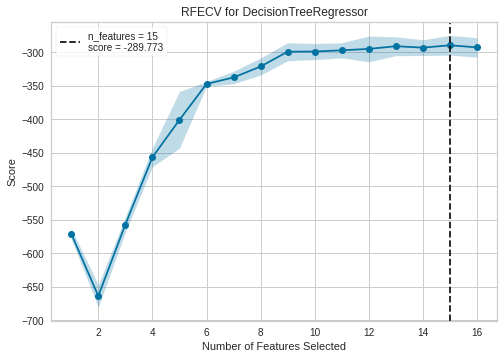

In [49]:
tree_selc_features = feature_selection(DecisionTreeRegressor(), tree_features, bike_count)

In [50]:
tree_data_prep = tree_features[tree_selc_features].copy()
tree_test_data_prep  = tree_test_features[tree_selc_features].copy()

In [51]:
tree = DecisionTreeRegressor()
tree.fit(tree_data_prep, bike_count)

DecisionTreeRegressor()

In [52]:
evaluate(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count)

0.0

In [53]:
evaluate(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count, cross_val = True)

290.71384241527

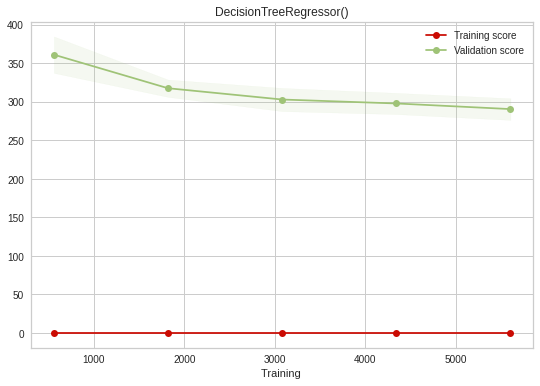

In [54]:
plot_learning_curves(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count)

In [ ]:
# from sklearn.tree import export_graphviz
# from graphviz import Source

# from IPython.display import SVG
# from IPython.display import display

# graph = Source(export_graphviz(
#     tree,
#     out_file = None,
#     feature_names = tree_data_prep.columns,
#     filled = True
# ))
# display(SVG(graph.pipe(format='svg')))

In [180]:
max_depth = tree.get_depth()
max_depth

30

In [181]:
tree_leaves = tree.get_n_leaves()
tree_leaves

6697

In [56]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [57]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer

In [ ]:
ccp_alphas = tree.cost_complexity_pruning_path(tree_data_prep, bike_count)["ccp_alphas"]

In [ ]:
ccp_alphas.shape

In [ ]:
# ccp_alphas_grid_search = GridSearchCV(
#     estimator = DecisionTreeRegressor(),
#     scoring = make_scorer(rmse, greater_is_better = False),
#     param_grid = ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]})
# )

In [ ]:
# ccp_alphas_grid_search.fit(features_sel, count_sel)

In [182]:

max_depth_grid_search = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    scoring = make_scorer(rmse, greater_is_better = False),
    param_grid = ParameterGrid(
        {"max_depth": [[max_depth] for max_depth in range(1, max_depth + 1)], 
         "max_leaf_nodes": [[tree_leaves] for tree_leaves in range(1, tree_leaves + 1)]}
    ),
)

In [ ]:
max_depth_grid_search.fit(tree_data_prep, bike_count)

In [177]:
max_depth_grid_search.best_estimator_

525

In [61]:
# d_tree = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 533)

In [178]:
evaluate(model = max_depth_grid_search.best_estimator_, data_prepared = tree_data_prep, label_prepared = bike_count, cross_val = True)

271.1527009384157

**Random Forest**

In [63]:
rf_features = tree_features.copy()
rf_test_features = tree_test_features.copy()

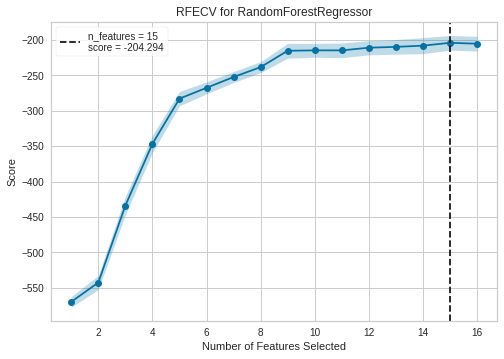

In [64]:
rf_selc_features = feature_selection(RandomForestRegressor(), rf_features, bike_count)

In [65]:
rf_data_prep = rf_features[rf_selc_features].copy()
rf_test_data_prep  = rf_test_features[rf_selc_features].copy()


In [66]:
rf_data_prep.shape

(7008, 15)

In [161]:
rf = RandomForestRegressor()
rf.fit(rf_data_prep, bike_count)

RandomForestRegressor()

In [162]:
evaluate(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count)

75.04420016741717

In [163]:
evaluate(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count, cross_val = True)

205.8017497272735

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


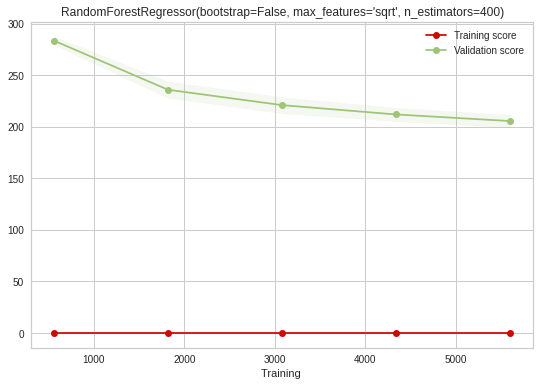

In [82]:
plot_learning_curves(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count)

In [164]:
# # searching for the best parameters of the model using RandomizedSearchCV

from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
#     "n_estimators": stats.randint(low = 100, high = 1000),
#     "max_features": stats.randint(low = 2, high = 15),
#     "max_depth": stats.randint(low = 1, high = 29),

      "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
# Number of features to consider at every split
      "max_features": ['auto', 'sqrt', "log2"],
# Maximum number of levels in tree
      "max_depth": [int(x) for x in np.linspace(1, 32, num = 11)]
# max_depth.append(None)

}

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                                cv = 5, refit = True, scoring = make_scorer(rmse,greater_is_better = False))
rnd_search.fit(rf_data_prep, bike_count)

TypeError: ignored

In [154]:
rnd_search.best_params_

{'max_depth': 25, 'max_features': 'auto', 'n_estimators': 1600}

In [88]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt', "log2"]
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [89]:
# # Plot residuals
# wandb.sklearn.plot_residuals(model, X, y)

In [90]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring = make_scorer(rmse,greater_is_better = False), n_iter = 100, cv = 3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(rf_data_prep, bike_count)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42,
                   scoring=make_scorer(rmse, greater_is_better=False))

In [157]:
rnd_search.best_score_

-203.91362339760957

In [155]:
pred = rnd_search.best_estimator_.predict(rf_test_data_prep)
rmse(test_bike_count, pred)

207.64103945350078

In [120]:
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR


estimators = [
     ('lr', SVR()),
     ('DT', DecisionTreeRegressor())]
sr = StackingRegressor(estimators = estimators)
# evaluate(model = sr, data_prepared = rf_data_prep, label_prepared = bike_count, cross_val = True)
sr.fit(rf_data_prep, bike_count)

StackingRegressor(estimators=[('lr', SVR()), ('DT', DecisionTreeRegressor())])

In [158]:
evaluate(model = rnd_search.best_estimator_, data_prepared = rf_data_prep, label_prepared = bike_count, cross_val = False)

72.66898780959993

In [ ]:
# min_samples_split, max_leaf_nodes, max_depth and min_samples_leaf.


**Gradient Boosting Regression**

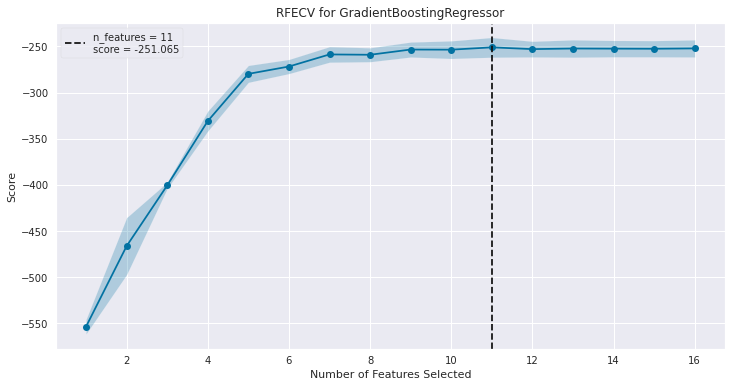

In [ ]:
gbr_selc_features = feature_selection(GradientBoostingRegressor() , tree_features, bike_count)

In [ ]:
gbr_data_prep = tree_features[gbr_selc_features].copy()
gbr_test_data_prep  = tree_test_features[gbr_selc_features].copy()

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(gbr_data_prep, bike_count)

GradientBoostingRegressor()

In [ ]:
evaluate(model = gbr, data_prepared = gbr_data_prep, label_prepared = bike_count)

241.82790102971992

In [ ]:
evaluate(model = gbr, data_prepared = gbr_data_prep, label_prepared = bike_count, cross_val = True)

249.56445862938205

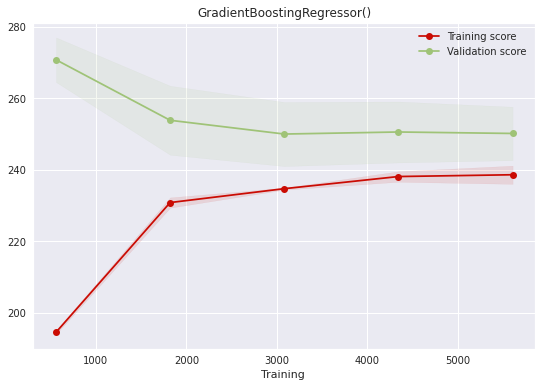

In [ ]:
plot_learning_curves(model = gbr, data_prepared = gbr_data_prep, label_prepared = bike_count)

In [ ]:
# from yellowbrick.regressor import PredictionError, ResidualsPlot

# visual = PredictionError(knn).fit(features_prepared, bike_count)
# visual.score(test_features_prepared, test_count)
# visual.poof()

In [ ]:
# tree = DecisionTreeRegressor()
# tree.fit(features_sel, count_sel)
# pred = tree.predict(features_sel)
# rmse(count_sel, pred)

In [ ]:
# max_depth = tree.get_depth()
# max_depth

In [ ]:
# from sklearn.model_selection import GridSearchCV, ParameterGrid
# from sklearn.metrics import make_scorer

In [ ]:

# max_depth_grid_search = GridSearchCV(
#     estimator = DecisionTreeRegressor(),
#     scoring = make_scorer(rmse, greater_is_better = False),
#     param_grid = ParameterGrid(
#         {"max_depth": [[max_depth] for max_depth in range(1, max_depth + 1)]}
#     ),
# )

In [ ]:
# max_depth_grid_search.fit(features_sel, count_sel)

In [ ]:
# max_depth_grid_search.best_params_

In [ ]:
# pred = max_depth_grid_search.best_estimator_.predict(features_sel)
# rmse(count_sel, pred)

In [ ]:
# ccp_alphas = tree.cost_complexity_pruning_path(features_sel, count_sel)["ccp_alphas"]

In [ ]:
# ccp_alphas.shape

In [ ]:
# ccp_alphas_grid_search = GridSearchCV(
#     estimator = DecisionTreeRegressor(),
#     scoring = make_scorer(rmse, greater_is_better = False),
#     param_grid = ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]})
# )

In [ ]:
# ccp_alphas_grid_search.fit(features_sel, count_sel)

In [ ]:
# ccp_alphas_grid_search.best_params_

In [ ]:
# max_depth_grid_search.best_params_

In [ ]:
# tree = DecisionTreeRegressor(max_depth = 25, ccp_alpha = 0.04654430894111189)

In [ ]:
# tree.fit(features_sel, count_sel)

In [ ]:
# pred = max_depth_grid_search.predict(features_sel)
# rmse(count_sel, pred)

In [ ]:
# test_count = test_set["Rented Bike Count"].copy()
# test_features = test_set.drop(columns = "Rented Bike Count")

In [ ]:
# test_features = transform(test_features)
# test_count = np.sqrt(test_count)

In [ ]:
# pred = max_depth_grid_search.best_estimator_.predict(test_features)
# rmse(test_count, pred)

In [ ]:
# from sklearn.model_selection import learning_curve

In [ ]:
# def plot_learning_curves(model, data_prepared, label_prepared):

#   train_sizes, train_scores, test_scores = learning_curve(model,
#                                                             data_prepared, label_prepared, n_jobs = -1, scoring = make_scorer(rmse, greater_is_better = False), cv = 10, verbose = 0)
#   train_scores_mean = np.mean(-train_scores, axis=1)
#   train_scores_std = np.std(train_scores, axis=1)
#   test_scores_mean = np.mean(-test_scores, axis=1)
#   test_scores_std = np.std(test_scores, axis=1)

#   fig = plt.figure(figsize = (9, 6))
#   ax = fig.gca()
    
#   # plot the std deviation as a transparent range at each training set size
#   plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
#   plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

#   # plot the average training and test score lines at each training set size
#   plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#   plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

#   ax.set_title(model)
#   plt.legend(loc="best")
#   plt.ylim()
#   plt.show()

In [ ]:
# plot_learning_curves(max_depth_grid_search.best_estimator_, features_sel, count_sel)

In [ ]:
# forest = RandomForestRegressor()
# forest.fit(features_sel, count_sel)
# pred = forest.predict(features_sel)
# rmse(count_sel, pred)

In [ ]:
# forest.get_params()

In [ ]:

# max_depth_grid_search = GridSearchCV(
#     estimator = RandomForestRegressor(),
#     scoring = make_scorer(rmse, greater_is_better = False),
#     param_grid = ParameterGrid(
#         {"max_depth": [[max_depth] for max_depth in range(1, max_depth + 1)]}
#     ),
# )

In [ ]:
# max_depth_grid_search.fit(features_sel, count_sel)

In [ ]:
# max_depth

In [ ]:
# max_depth_grid_search.best_params_

In [ ]:
# ccp_alphas = forest.cost_complexity_pruning_path(features_sel, count_sel)["ccp_alphas"]

In [ ]:
# ccp_alphas.shape

In [ ]:
# ccp_alphas_grid_search = GridSearchCV(
#     estimator = RandomForestRegressor(),
#     scoring = make_scorer(rmse, greater_is_better = False),
#     param_grid = ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]})
# )

In [ ]:
# ccp_alphas_grid_search.fit(features_sel, count_sel)

In [ ]:
# pred = ccp_alphas_grid_search.best_estimator_.predict(features_sel)
# rmse(count_sel, pred)

In [ ]:
# pred = forest.predict(test_features)
# rmse(test_count, pred)